# Exercise 2: Agent with multiple inputs

In [1]:
from typing import TypedDict, List, Literal
from math import prod
from langgraph.graph import StateGraph

In [2]:
PROCESSING_NODE = "processing_node"

In [3]:
class AgentState(TypedDict):
    name: str
    numbers: List[int]
    operation: Literal["+", "*"]
    result: int
    message: str


def processing_node_function(state: AgentState) -> AgentState:
    """Node function to create a string with the given name, and the result of an operation with arguments passed in the state"""

    operation_functions = {
        "+": sum,
        "*": prod
    }

    state['result'] = operation_functions[state['operation']](state['numbers'])
    state['message'] = f"Hi! {state['name']}, the result is {state['result']}!"

    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node(PROCESSING_NODE, processing_node_function)

graph.set_entry_point(PROCESSING_NODE)
graph.set_finish_point(PROCESSING_NODE)

agent = graph.compile()

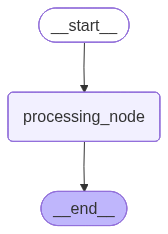

In [5]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [6]:
result = agent.invoke(
    {
        "name": "Felipe",
        "numbers": [1, 2, 3, 5, 8],
        "operation": "+"
    }
)

result["message"]

'Hi! Felipe, the result is 19!'

In [7]:
result = agent.invoke(
    {
        "name": "Luis",
        "numbers": [1, 2, 3, 5, 8],
        "operation": "*"
    }
)

result["message"]

'Hi! Luis, the result is 240!'